# Game Recomendations on Steam Platform 

Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.preprocessing import MinMaxScaler

DataFiles

In [2]:
# Read the data from files
path = './archive'
df_games = pd.read_csv(path+"/games.csv")
df_users = pd.read_csv(path+"/users.csv")
df_recommendations = pd.read_csv(path+"/recommendations.csv")
df_genre = pd.read_json(path+'/games_metadata.json', lines=True)

Overview

In [3]:
df_games.head(10)

,app_id,title,date_release,win,mac,linux,rating,positive_ratio,user_reviews,price_final,price_original,discount,steam_deck
0,13500,Prince of Persia: Warrior Within™,2008-11-21,True,False,False,Very Positive,84,2199,9.99,9.99,0.0,True
1,22364,BRINK: Agents of Change,2011-08-03,True,False,False,Positive,85,21,2.99,2.99,0.0,True
2,113020,Monaco: What's Yours Is Mine,2013-04-24,True,True,True,Very Positive,92,3722,14.99,14.99,0.0,True
3,226560,Escape Dead Island,2014-11-18,True,False,False,Mixed,61,873,14.99,14.99,0.0,True
4,249050,Dungeon of the ENDLESS™,2014-10-27,True,True,False,Very Positive,88,8784,11.99,11.99,0.0,True
5,250180,METAL SLUG 3,2015-09-14,True,False,False,Very Positive,90,5579,7.99,7.99,0.0,True
6,253980,Enclave,2013-10-04,True,True,True,Mostly Positive,75,1608,4.99,4.99,0.0,True
7,271850,Men of War: Assault Squad 2 - Deluxe Edition u...,2014-05-16,True,False,False,Mixed,61,199,6.99,6.99,0.0,True
8,282900,Hyperdimension Neptunia Re;Birth1,2015-01-29,True,False,False,Very Positive,94,9686,14.99,14.99,0.0,True
9,19810,The Sum of All Fears,2008-10-10,True,False,False,Mostly Positive,75,33,9.99,9.99,0.0,True


In [4]:
df_users.head(10)

,user_id,products,reviews
0,7360263,359,0
1,14020781,156,1
2,8762579,329,4
3,4820647,176,4
4,5167327,98,2
5,5664667,145,5
6,5889167,447,2
7,7281762,1083,1
8,7445952,273,1
9,7462927,51,1


In [5]:
df_recommendations.head(10)

,app_id,helpful,funny,date,is_recommended,hours,user_id,review_id
0,975370,0,0,2022-12-12,True,36.3,51580,0
1,304390,4,0,2017-02-17,False,11.5,2586,1
2,1085660,2,0,2019-11-17,True,336.5,253880,2
3,703080,0,0,2022-09-23,True,27.4,259432,3
4,526870,0,0,2021-01-10,True,7.9,23869,4
5,306130,0,0,2021-10-10,True,8.6,45425,5
6,238960,0,0,2017-11-25,True,538.8,88282,6
7,730,0,0,2021-11-30,False,157.5,63209,7
8,255710,0,0,2021-05-21,True,18.7,354512,8
9,289070,0,0,2020-05-26,True,397.5,454422,9


In [6]:
df_genre.head(10)

,app_id,description,tags
0,13500,Enter the dark underworld of Prince of Persia ...,"[Action, Adventure, Parkour, Third Person, Gre..."
1,22364,,[Action]
2,113020,Monaco: What's Yours Is Mine is a single playe...,"[Co-op, Stealth, Indie, Heist, Local Co-Op, St..."
3,226560,Escape Dead Island is a Survival-Mystery adven...,"[Zombies, Adventure, Survival, Action, Third P..."
4,249050,Dungeon of the Endless is a Rogue-Like Dungeon...,"[Roguelike, Strategy, Tower Defense, Pixel Gra..."
5,250180,"“METAL SLUG 3”, the masterpiece in SNK’s emble...","[Arcade, Classic, Action, Co-op, Side Scroller..."
6,253980,Experience incredibly atmospheric and intense ...,"[RPG, Action, Fantasy, Third Person, Hack and ..."
7,271850,,"[Strategy, Simulation, Action, RTS, World War II]"
8,282900,"Packed with fast-paced, turn-based RPG action,...","[Anime, JRPG, Female Protagonist, Cute, RPG, S..."
9,19810,Lead a team of domestic counter-terrorism expe...,"[Action, Tactical]"


In [7]:
#Metadata of Dataframes
df_list = [
    ("df_games", df_games),
    ("df_users", df_users),
    ("df_recommendations", df_recommendations),
    ("df_genre", df_genre)
]

for name, df in df_list:
    print(f"\n📄 DataFrame: {name}")
    df.info()


📄 DataFrame: df_games
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50872 entries, 0 to 50871
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   app_id          50872 non-null  int64  
 1   title           50872 non-null  object 
 2   date_release    50872 non-null  object 
 3   win             50872 non-null  bool   
 4   mac             50872 non-null  bool   
 5   linux           50872 non-null  bool   
 6   rating          50872 non-null  object 
 7   positive_ratio  50872 non-null  int64  
 8   user_reviews    50872 non-null  int64  
 9   price_final     50872 non-null  float64
 10  price_original  50872 non-null  float64
 11  discount        50872 non-null  float64
 12  steam_deck      50872 non-null  bool   
dtypes: bool(4), float64(3), int64(3), object(3)
memory usage: 3.7+ MB

📄 DataFrame: df_users
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14306064 entries, 0 to 14306063
Data columns (tot

In [8]:
# Converting all object columns to string dtype
df_games = df_games.astype({col: 'string' for col in df_games.select_dtypes(include='object').columns})
df_genre = df_genre.astype({col: 'string' for col in df_genre.select_dtypes(include='object').columns})

# Converting the date related columns to date dtype
df_games['date_release'] = pd.to_datetime(df_games['date_release'])
df_recommendations['date'] = pd.to_datetime(df_recommendations['date'])

In [9]:
#Metadata of Dataframes after datatype conversions
df_list = [
    ("df_games", df_games),
    ("df_users", df_users),
    ("df_recommendations", df_recommendations),
    ("df_genre", df_genre)
]

for name, df in df_list:
    print(f"\n📄 DataFrame: {name}")
    df.info()


📄 DataFrame: df_games
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50872 entries, 0 to 50871
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   app_id          50872 non-null  int64         
 1   title           50872 non-null  string        
 2   date_release    50872 non-null  datetime64[ns]
 3   win             50872 non-null  bool          
 4   mac             50872 non-null  bool          
 5   linux           50872 non-null  bool          
 6   rating          50872 non-null  string        
 7   positive_ratio  50872 non-null  int64         
 8   user_reviews    50872 non-null  int64         
 9   price_final     50872 non-null  float64       
 10  price_original  50872 non-null  float64       
 11  discount        50872 non-null  float64       
 12  steam_deck      50872 non-null  bool          
dtypes: bool(4), datetime64[ns](1), float64(3), int64(3), string(2)
memory usage: 3.7 MB

In [10]:
for name, df in df_list:
    print(f"Total No. of records in \n📄 DataFrame: {name}")
    print(df.shape[0])

Total No. of records in 
📄 DataFrame: df_games
50872
Total No. of records in 
📄 DataFrame: df_users
14306064
Total No. of records in 
📄 DataFrame: df_recommendations
41154794
Total No. of records in 
📄 DataFrame: df_genre
50872


In [11]:
#Checking for Null Values
for name, df in df_list:
    print(f"\n📄 DataFrame Null Values: {name}")
    print(df.isna().sum())


📄 DataFrame Null Values: df_games
app_id            0
title             0
date_release      0
win               0
mac               0
linux             0
rating            0
positive_ratio    0
user_reviews      0
price_final       0
price_original    0
discount          0
steam_deck        0
dtype: int64

📄 DataFrame Null Values: df_users
user_id     0
products    0
reviews     0
dtype: int64

📄 DataFrame Null Values: df_recommendations
app_id            0
helpful           0
funny             0
date              0
is_recommended    0
hours             0
user_id           0
review_id         0
dtype: int64

📄 DataFrame Null Values: df_genre
app_id         0
description    0
tags           0
dtype: int64


In [12]:
#Checking for 'app_id' Duplicate Values in all dataframes
for name, df in df_list:
    if 'app_id' in df:
        print(f'Total records count in {name} 📄: ',df.shape[0])
        print(f'Distinct app_id records in {name} 📄: ',df['app_id'].nunique())
        
#Checking for 'user_id' Duplicate Values in df_users
print(f'Total records count in df_users 📄: ',df_users.shape[0])
print(f'Distinct user_id records in df_users 📄: ',df_users['user_id'].nunique()) 

#Checking for duplicated based on combination of app_id & their description
print(f'Total duplicate records count in df_games 📄: ',df_games.duplicated(subset=['app_id', 'title']).sum())
print(f'Total duplicate records count in df_genre 📄: ',df_genre.duplicated(subset=['app_id','description']).sum())     
        

Total records count in df_games 📄:  50872
Distinct app_id records in df_games 📄:  50872
Total records count in df_recommendations 📄:  41154794
Distinct app_id records in df_recommendations 📄:  37610
Total records count in df_genre 📄:  50872
Distinct app_id records in df_genre 📄:  50872
Total records count in df_users 📄:  14306064
Distinct user_id records in df_users 📄:  14306064
Total duplicate records count in df_games 📄:  0
Total duplicate records count in df_genre 📄:  0


Data Preprocessing

In [13]:
#Focusing only on the games available on macos
counts = df_games['mac'].value_counts()
print(counts)

mac
False    37854
True     13018
Name: count, dtype: int64


In [14]:
df_games_processed = df_games.copy()
df_games_processed = df_games_processed[df_games_processed['mac'] == True]

In [15]:
df_games_processed

,app_id,title,date_release,win,mac,linux,rating,positive_ratio,user_reviews,price_final,price_original,discount,steam_deck
2,113020,Monaco: What's Yours Is Mine,2013-04-24,True,True,True,Very Positive,92,3722,14.99,14.99,0.0,True
4,249050,Dungeon of the ENDLESS™,2014-10-27,True,True,False,Very Positive,88,8784,11.99,11.99,0.0,True
6,253980,Enclave,2013-10-04,True,True,True,Mostly Positive,75,1608,4.99,4.99,0.0,True
13,29180,Osmos,2009-08-18,True,True,True,Very Positive,88,532,9.99,9.99,0.0,True
18,245950,Borderlands 2: Headhunter 4: Wedding Day Massacre,2014-02-11,True,True,True,Very Positive,84,294,0.89,2.99,70.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
50830,2195430,Two Point Campus: Medical School,2023-08-17,True,True,True,Mixed,50,22,10.00,0.00,0.0,True
50835,2446110,Stacklands: Cursed Worlds,2023-07-25,True,True,False,Very Positive,90,62,4.00,0.00,0.0,True
50848,2515460,Northgard - Kernev Clan of the Stoat,2023-08-24,True,True,True,Mixed,67,80,5.00,0.00,0.0,True
50851,1555150,Pocket Bravery,2023-08-31,True,True,True,Very Positive,89,248,20.00,0.00,0.0,True


In [16]:
df_games_processed.drop(columns=['win', 'mac','linux','steam_deck','positive_ratio', 'discount', 'price_original'], inplace=True)

In [17]:

# Define custom order from worst to best (if reversed)
order = ["Overwhelmingly Positive", "Very Positive", "Positive", "Mostly Positive",
         "Mixed", "Mostly Negative", "Negative", "Very Negative", "Overwhelmingly Negative"][::-1]

# Initialize encoder with the custom order
enc = OrdinalEncoder(categories=[order])

# Transform the 'rating' column to ordinal values
df_games_processed[['rating']] = enc.fit_transform(df_games_processed[['rating']])

In [18]:
df_games_processed

,app_id,title,date_release,rating,user_reviews,price_final
2,113020,Monaco: What's Yours Is Mine,2013-04-24,7.0,3722,14.99
4,249050,Dungeon of the ENDLESS™,2014-10-27,7.0,8784,11.99
6,253980,Enclave,2013-10-04,5.0,1608,4.99
13,29180,Osmos,2009-08-18,7.0,532,9.99
18,245950,Borderlands 2: Headhunter 4: Wedding Day Massacre,2014-02-11,7.0,294,0.89
...,...,...,...,...,...,...
50830,2195430,Two Point Campus: Medical School,2023-08-17,4.0,22,10.00
50835,2446110,Stacklands: Cursed Worlds,2023-07-25,7.0,62,4.00
50848,2515460,Northgard - Kernev Clan of the Stoat,2023-08-24,4.0,80,5.00
50851,1555150,Pocket Bravery,2023-08-31,7.0,248,20.00


In [19]:
games_processed = pd.merge(df_games_processed, df_genre[['app_id', 'tags']], on='app_id', how='inner')

In [20]:
games_processed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13018 entries, 0 to 13017
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   app_id        13018 non-null  int64         
 1   title         13018 non-null  string        
 2   date_release  13018 non-null  datetime64[ns]
 3   rating        13018 non-null  float64       
 4   user_reviews  13018 non-null  int64         
 5   price_final   13018 non-null  float64       
 6   tags          13018 non-null  string        
dtypes: datetime64[ns](1), float64(2), int64(2), string(2)
memory usage: 712.1 KB


In [21]:
games_processed

,app_id,title,date_release,rating,user_reviews,price_final,tags
0,113020,Monaco: What's Yours Is Mine,2013-04-24,7.0,3722,14.99,"['Co-op', 'Stealth', 'Indie', 'Heist', 'Local ..."
1,249050,Dungeon of the ENDLESS™,2014-10-27,7.0,8784,11.99,"['Roguelike', 'Strategy', 'Tower Defense', 'Pi..."
2,253980,Enclave,2013-10-04,5.0,1608,4.99,"['RPG', 'Action', 'Fantasy', 'Third Person', '..."
3,29180,Osmos,2009-08-18,7.0,532,9.99,"['Indie', 'Casual', 'Puzzle', 'Relaxing', 'Sin..."
4,245950,Borderlands 2: Headhunter 4: Wedding Day Massacre,2014-02-11,7.0,294,0.89,"['Action', 'RPG', 'FPS', 'Co-op', 'Shooter', '..."
...,...,...,...,...,...,...,...
13013,2195430,Two Point Campus: Medical School,2023-08-17,4.0,22,10.00,[]
13014,2446110,Stacklands: Cursed Worlds,2023-07-25,7.0,62,4.00,"['Simulation', 'Indie', 'Casual', 'Survival', ..."
13015,2515460,Northgard - Kernev Clan of the Stoat,2023-08-24,4.0,80,5.00,"['Strategy', 'Indie', 'Simulation']"
13016,1555150,Pocket Bravery,2023-08-31,7.0,248,20.00,[]


In [22]:
games_processed['tags'] = games_processed['tags'].str.replace(r"[\[\]\{\}'\"]", "", regex=True)

In [23]:
games_processed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13018 entries, 0 to 13017
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   app_id        13018 non-null  int64         
 1   title         13018 non-null  string        
 2   date_release  13018 non-null  datetime64[ns]
 3   rating        13018 non-null  float64       
 4   user_reviews  13018 non-null  int64         
 5   price_final   13018 non-null  float64       
 6   tags          13018 non-null  string        
dtypes: datetime64[ns](1), float64(2), int64(2), string(2)
memory usage: 712.1 KB


In [24]:
games_processed = games_processed.astype({col: 'string' for col in games_processed.select_dtypes(include='object').columns})
#Ensuring tags are lists
games_processed['tags'] = games_processed['tags'].fillna('').str.split(', ')

#Fit-transform into a dense array
mlb = MultiLabelBinarizer()
tag_matrix = mlb.fit_transform(games_processed['tags'])

#Build one-hot DataFrame with the same index
genre_encoded = pd.DataFrame(
    tag_matrix,
    columns=[f"{t}" for t in mlb.classes_],
    index=games_processed.index    # ← correct usage
)

#Concatenate back
games_processed = pd.concat(
    [games_processed.drop('tags', axis=1), genre_encoded],
    axis=1
)


In [25]:
games_processed

,app_id,title,date_release,rating,user_reviews,price_final,,1980s,1990s,2.5D,...,Well-Written,Werewolves,Western,Wholesome,Word Game,World War I,World War II,Wrestling,Zombies,eSports
0,113020,Monaco: What's Yours Is Mine,2013-04-24,7.0,3722,14.99,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,249050,Dungeon of the ENDLESS™,2014-10-27,7.0,8784,11.99,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,253980,Enclave,2013-10-04,5.0,1608,4.99,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,29180,Osmos,2009-08-18,7.0,532,9.99,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,245950,Borderlands 2: Headhunter 4: Wedding Day Massacre,2014-02-11,7.0,294,0.89,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13013,2195430,Two Point Campus: Medical School,2023-08-17,4.0,22,10.00,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13014,2446110,Stacklands: Cursed Worlds,2023-07-25,7.0,62,4.00,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13015,2515460,Northgard - Kernev Clan of the Stoat,2023-08-24,4.0,80,5.00,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13016,1555150,Pocket Bravery,2023-08-31,7.0,248,20.00,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [26]:
# Choose the numeric columns to normalize
numeric_cols = ['rating', 'user_reviews', 'price_final']

# Fit scaler and transform
scaler = MinMaxScaler()
games_processed[numeric_cols] = scaler.fit_transform(games_processed[numeric_cols])


In [27]:
games_processed

,app_id,title,date_release,rating,user_reviews,price_final,,1980s,1990s,2.5D,...,Well-Written,Werewolves,Western,Wholesome,Word Game,World War I,World War II,Wrestling,Zombies,eSports
0,113020,Monaco: What's Yours Is Mine,2013-04-24,0.875,0.000495,0.055521,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,249050,Dungeon of the ENDLESS™,2014-10-27,0.875,0.001171,0.044409,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,253980,Enclave,2013-10-04,0.625,0.000213,0.018482,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,29180,Osmos,2009-08-18,0.875,0.000070,0.037001,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,245950,Borderlands 2: Headhunter 4: Wedding Day Massacre,2014-02-11,0.875,0.000038,0.003296,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13013,2195430,Two Point Campus: Medical School,2023-08-17,0.500,0.000002,0.037038,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13014,2446110,Stacklands: Cursed Worlds,2023-07-25,0.875,0.000007,0.014815,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13015,2515460,Northgard - Kernev Clan of the Stoat,2023-08-24,0.500,0.000009,0.018519,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13016,1555150,Pocket Bravery,2023-08-31,0.875,0.000032,0.074077,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [28]:
trail_games = games_processed[games_processed['date_release'].dt.year >= 2020]

In [29]:
trail_games

,app_id,title,date_release,rating,user_reviews,price_final,,1980s,1990s,2.5D,...,Well-Written,Werewolves,Western,Wholesome,Word Game,World War I,World War II,Wrestling,Zombies,eSports
12,1872790,Luckitown,2022-01-19,0.875,0.000020,0.018482,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17,1259750,Tropico 6 - Spitter,2020-04-23,0.500,0.000003,0.037001,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
61,498310,RPG in a Box,2022-05-10,0.875,0.000019,0.111078,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69,672630,Academia : School Simulator,2021-01-28,0.875,0.000288,0.074040,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
98,914890,Nine Noir Lives,2022-09-07,0.750,0.000004,0.074040,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13013,2195430,Two Point Campus: Medical School,2023-08-17,0.500,0.000002,0.037038,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13014,2446110,Stacklands: Cursed Worlds,2023-07-25,0.875,0.000007,0.014815,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13015,2515460,Northgard - Kernev Clan of the Stoat,2023-08-24,0.500,0.000009,0.018519,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13016,1555150,Pocket Bravery,2023-08-31,0.875,0.000032,0.074077,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [30]:

common_game_ids = trail_games['app_id'].unique()   # all game IDs in df2
recommendations_df = df_recommendations[df_recommendations['app_id'].isin(common_game_ids)].copy()

In [31]:
trial_2 = recommendations_df[recommendations_df['date'].dt.year >= 2020]

In [32]:
trial_2.count()

app_id            2264383
helpful           2264383
funny             2264383
date              2264383
is_recommended    2264383
hours             2264383
user_id           2264383
review_id         2264383
dtype: int64

In [33]:
trial_2

,app_id,helpful,funny,date,is_recommended,hours,user_id,review_id
11,1086940,0,0,2020-10-07,True,50.0,85822,11
34,1145360,0,0,2021-03-15,True,36.3,234421,34
36,1794680,0,0,2022-11-23,True,55.8,337740,36
48,1248130,0,0,2022-07-18,True,19.2,1093813,48
56,1248130,0,0,2022-04-23,True,27.2,1601711,56
...,...,...,...,...,...,...,...,...
41154761,1274570,0,3,2021-09-26,True,43.0,11394978,41154761
41154762,1274570,0,3,2021-09-26,True,97.0,2235622,41154762
41154769,1138660,0,0,2021-08-13,False,11.0,10433531,41154769
41154774,1240210,0,0,2021-03-01,True,10.0,852210,41154774


In [34]:
recommendations = recommendations_df[recommendations_df['date'].dt.year >= 2020]

In [35]:
recommendations.count()

app_id            2264383
helpful           2264383
funny             2264383
date              2264383
is_recommended    2264383
hours             2264383
user_id           2264383
review_id         2264383
dtype: int64

In [36]:
recommendations

,app_id,helpful,funny,date,is_recommended,hours,user_id,review_id
11,1086940,0,0,2020-10-07,True,50.0,85822,11
34,1145360,0,0,2021-03-15,True,36.3,234421,34
36,1794680,0,0,2022-11-23,True,55.8,337740,36
48,1248130,0,0,2022-07-18,True,19.2,1093813,48
56,1248130,0,0,2022-04-23,True,27.2,1601711,56
...,...,...,...,...,...,...,...,...
41154761,1274570,0,3,2021-09-26,True,43.0,11394978,41154761
41154762,1274570,0,3,2021-09-26,True,97.0,2235622,41154762
41154769,1138660,0,0,2021-08-13,False,11.0,10433531,41154769
41154774,1240210,0,0,2021-03-01,True,10.0,852210,41154774


In [37]:
#Droping the review_id column & coverting booolean to numeric
recommendations.drop(columns=['review_id'], inplace=True)
recommendations['is_recommended'] = recommendations['is_recommended'].astype(int)

C:\Users\MaximilianSchikofski\AppData\Local\Temp\ipykernel_16832\740696962.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  recommendations.drop(columns=['review_id'], inplace=True)
C:\Users\MaximilianSchikofski\AppData\Local\Temp\ipykernel_16832\740696962.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  recommendations['is_recommended'] = recommendations['is_recommended'].astype(int)


In [38]:
recommendations

,app_id,helpful,funny,date,is_recommended,hours,user_id
11,1086940,0,0,2020-10-07,1,50.0,85822
34,1145360,0,0,2021-03-15,1,36.3,234421
36,1794680,0,0,2022-11-23,1,55.8,337740
48,1248130,0,0,2022-07-18,1,19.2,1093813
56,1248130,0,0,2022-04-23,1,27.2,1601711
...,...,...,...,...,...,...,...
41154761,1274570,0,3,2021-09-26,1,43.0,11394978
41154762,1274570,0,3,2021-09-26,1,97.0,2235622
41154769,1138660,0,0,2021-08-13,0,11.0,10433531
41154774,1240210,0,0,2021-03-01,1,10.0,852210


In [39]:
count = (recommendations['hours'] < 2).sum()
count

248094

In [40]:
recommendations_df = recommendations[recommendations['hours'] > 2].copy()

In [41]:
recommendations_df

,app_id,helpful,funny,date,is_recommended,hours,user_id
11,1086940,0,0,2020-10-07,1,50.0,85822
34,1145360,0,0,2021-03-15,1,36.3,234421
36,1794680,0,0,2022-11-23,1,55.8,337740
48,1248130,0,0,2022-07-18,1,19.2,1093813
56,1248130,0,0,2022-04-23,1,27.2,1601711
...,...,...,...,...,...,...,...
41154761,1274570,0,3,2021-09-26,1,43.0,11394978
41154762,1274570,0,3,2021-09-26,1,97.0,2235622
41154769,1138660,0,0,2021-08-13,0,11.0,10433531
41154774,1240210,0,0,2021-03-01,1,10.0,852210


In [42]:
#Compute max hours_played per user
user_max_hours = recommendations_df.groupby('user_id')['hours'].max().reset_index()
user_max_hours.rename(columns={'hours': 'max_hours'}, inplace=True)

# Merge with original DataFrame
recommendations_df = recommendations_df.merge(user_max_hours, on='user_id')

#Compute implicit rating
recommendations_df['rating'] = recommendations_df['hours'] / recommendations_df['max_hours']

In [43]:
recommendations_df

,app_id,helpful,funny,date,is_recommended,hours,user_id,max_hours,rating
0,1086940,0,0,2020-10-07,1,50.0,85822,50.0,1.000000
1,1145360,0,0,2021-03-15,1,36.3,234421,36.3,1.000000
2,1794680,0,0,2022-11-23,1,55.8,337740,55.8,1.000000
3,1248130,0,0,2022-07-18,1,19.2,1093813,19.2,1.000000
4,1248130,0,0,2022-04-23,1,27.2,1601711,27.2,1.000000
...,...,...,...,...,...,...,...,...,...
1993330,1274570,0,3,2021-09-26,1,43.0,11394978,62.0,0.693548
1993331,1274570,0,3,2021-09-26,1,97.0,2235622,97.0,1.000000
1993332,1138660,0,0,2021-08-13,0,11.0,10433531,25.0,0.440000
1993333,1240210,0,0,2021-03-01,1,10.0,852210,10.0,1.000000


In [44]:
recommendations_df.drop(columns=['max_hours'], inplace=True)

In [45]:
recommendations_df

,app_id,helpful,funny,date,is_recommended,hours,user_id,rating
0,1086940,0,0,2020-10-07,1,50.0,85822,1.000000
1,1145360,0,0,2021-03-15,1,36.3,234421,1.000000
2,1794680,0,0,2022-11-23,1,55.8,337740,1.000000
3,1248130,0,0,2022-07-18,1,19.2,1093813,1.000000
4,1248130,0,0,2022-04-23,1,27.2,1601711,1.000000
...,...,...,...,...,...,...,...,...
1993330,1274570,0,3,2021-09-26,1,43.0,11394978,0.693548
1993331,1274570,0,3,2021-09-26,1,97.0,2235622,1.000000
1993332,1138660,0,0,2021-08-13,0,11.0,10433531,0.440000
1993333,1240210,0,0,2021-03-01,1,10.0,852210,1.000000


In [46]:
# Choose the numeric columns to normalize
numeric_cols = ['helpful', 'funny', 'hours']

# Fit scaler and transform
scaler = MinMaxScaler()
recommendations_df[numeric_cols] = scaler.fit_transform(recommendations_df[numeric_cols])

In [47]:
recommendations_df

,app_id,helpful,funny,date,is_recommended,hours,user_id,rating
0,1086940,0.000000,0.000000,2020-10-07,1,0.048001,85822,1.000000
1,1145360,0.000000,0.000000,2021-03-15,1,0.034272,234421,1.000000
2,1794680,0.000000,0.000000,2022-11-23,1,0.053813,337740,1.000000
3,1248130,0.000000,0.000000,2022-07-18,1,0.017136,1093813,1.000000
4,1248130,0.000000,0.000000,2022-04-23,1,0.025153,1601711,1.000000
...,...,...,...,...,...,...,...,...
1993330,1274570,0.000000,0.000359,2021-09-26,1,0.040986,11394978,0.693548
1993331,1274570,0.000000,0.000359,2021-09-26,1,0.095100,2235622,1.000000
1993332,1138660,0.000000,0.000000,2021-08-13,0,0.008919,10433531,0.440000
1993333,1240210,0.000000,0.000000,2021-03-01,1,0.007917,852210,1.000000


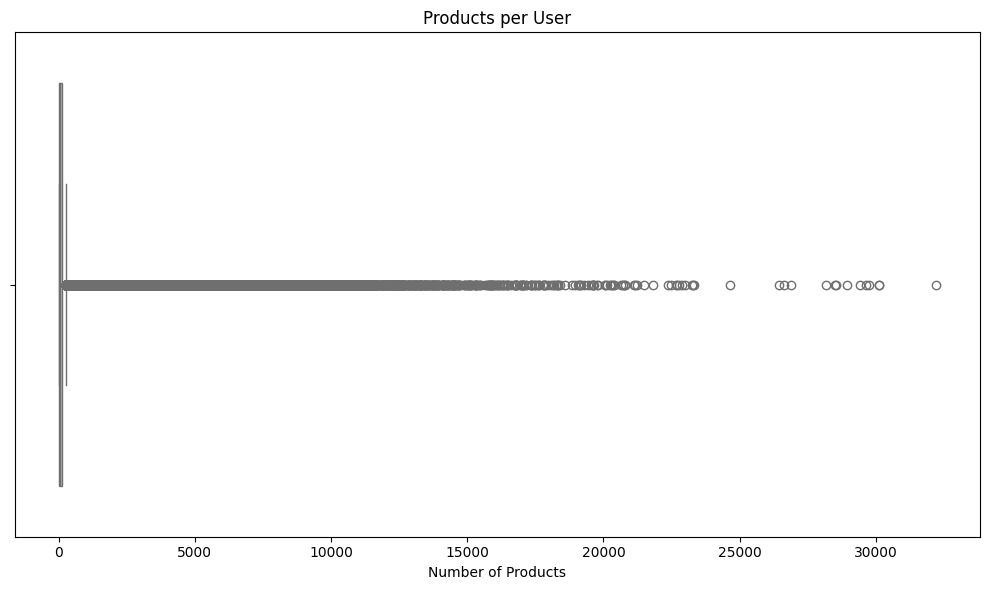

In [48]:
users = df_users.copy()
plt.figure(figsize=(10, 6))
sns.boxplot(x='products', data=users, color='skyblue')
plt.title('Products per User')
plt.xlabel('Number of Products')
plt.tight_layout()
plt.show()

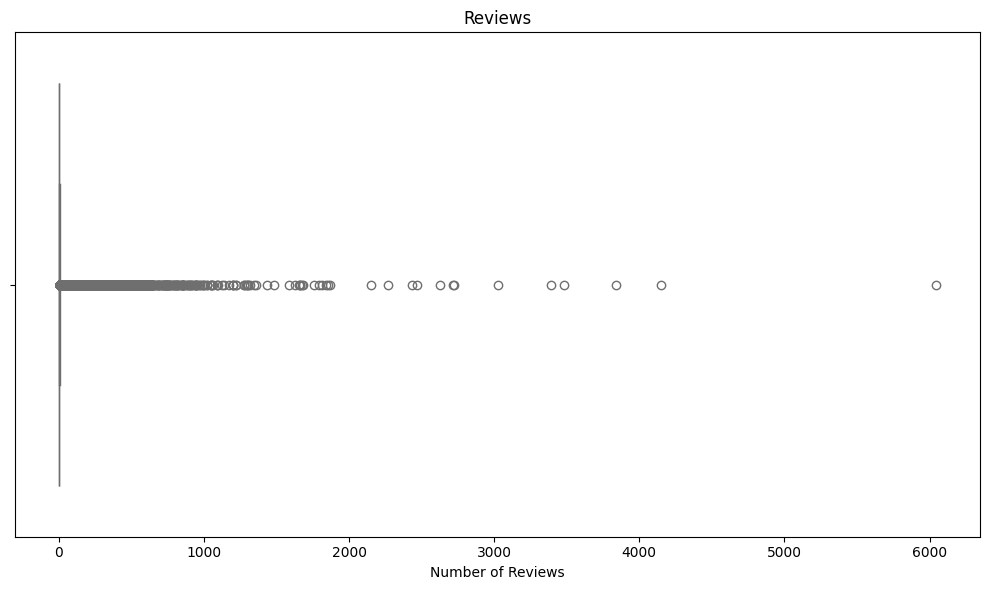

In [49]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='reviews', data=users, color='skyblue')
plt.title('Reviews')
plt.xlabel('Number of Reviews')
plt.tight_layout()
plt.show()

In [50]:
# Choose the numeric columns to normalize
numeric_cols = ['products', 'reviews']

# Fit scaler and transform
scaler = MinMaxScaler()
df_users[numeric_cols] = scaler.fit_transform(df_users[numeric_cols])

In [51]:
df_users

,user_id,products,reviews
0,7360263,0.011144,0.000000
1,14020781,0.004843,0.000165
2,8762579,0.010213,0.000662
3,4820647,0.005463,0.000662
4,5167327,0.003042,0.000331
...,...,...,...
14306059,5047430,0.000186,0.000000
14306060,5048153,0.000000,0.000000
14306061,5059205,0.000962,0.000000
14306062,5074363,0.000000,0.000000


In [52]:
common_user_ids = recommendations['user_id'].unique()   # all game IDs in df2
users = df_users[df_users['user_id'].isin(common_user_ids)].copy()

In [53]:
users

,user_id,products,reviews
12,9514331,0.007357,0.000662
28,13731271,0.018222,0.000496
32,984362,0.009965,0.000331
44,4586753,0.011827,0.000331
45,4616950,0.021792,0.005955
...,...,...,...
14305838,4825769,0.000528,0.000165
14305849,4830136,0.000000,0.000165
14305886,4846067,0.028342,0.001820
14305902,4854056,0.000000,0.000165


In [ ]:
#Training, Test and Validation Split
from sklearn.model_selection import train_test_split
from sklearn.metrics.pairwise import cosine_similarity

# Step 1: Filter to a manageable number of users
sampled_users = recommendations_df["user_id"]
df_small = recommendations_df[recommendations_df["user_id"].isin(sampled_users)]

# Step 2: Per-user train/val/test split without timestamp
train_rows, val_rows, test_rows = [], [], []

for user_id, group in df_small.groupby("user_id"):
    if len(group) < 3:
        continue

    user_train, user_temp = train_test_split(group, test_size=0.3, random_state=42)
    if len(user_temp) < 2:
        continue
    user_val, user_test = train_test_split(user_temp, test_size=0.5, random_state=42)

    train_rows.append(user_train)
    val_rows.append(user_val)
    test_rows.append(user_test)

df_train = pd.concat(train_rows)
df_val = pd.concat(val_rows)
df_test = pd.concat(test_rows)

# ✅ True Cold Start: Pull from df_users those with no interactions at all
all_known_users = set(df_users["user_id"].unique())
users_with_history = set(recommendations_df["user_id"].unique())
pure_cold_users = list(all_known_users - users_with_history)

# Sample and add to test set
import random
sampled_pure_cold_users = random.sample(pure_cold_users, min(40, len(pure_cold_users)))

df_fake_cold_test = pd.DataFrame({
    "user_id": sampled_pure_cold_users,
    "app_id": [None] * len(sampled_pure_cold_users)
})

df_test_expanded = pd.concat([df_test, df_fake_cold_test], ignore_index=True)

print(f"✅ Final split complete: Train={len(df_train)}, Val={len(df_val)}, Test={len(df_test)}, Test+Cold={len(df_test_expanded)}")

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import NearestNeighbors
from sklearn.model_selection import train_test_split
from collections import defaultdict
from sklearn.neighbors import NearestNeighbors
from scipy.sparse import coo_matrix

user_enc = LabelEncoder()
item_enc = LabelEncoder()

df_train['user_idx'] = user_enc.fit_transform(df_train['user_id'])
df_train['item_idx'] = item_enc.fit_transform(df_train['app_id'])

df_test = df_test[df_test['user_id'].isin(user_enc.classes_)]
df_test = df_test[df_test['app_id'].isin(item_enc.classes_)]
df_test['user_idx'] = user_enc.transform(df_test['user_id'])
df_test['item_idx'] = item_enc.transform(df_test['app_id'])

train_matrix = coo_matrix(
    (df_train['is_recommended'], (df_train['user_idx'], df_train['item_idx']))
).tocsr()

knn = NearestNeighbors(metric='cosine', algorithm='brute')
knn.fit(train_matrix)

N = 5  # Anzahl der Empfehlungen

user_topN_preds = {}

numberOfNeighbors = 1
while(numberOfNeighbors < 500):

    for user_idx in range(train_matrix.shape[0]):
        dists, indices = knn.kneighbors(train_matrix[user_idx], n_neighbors=numberOfNeighbors)
        neighbors = indices[0][1:]  # Exclude self

        neighbor_items = train_matrix[neighbors].sum(axis=0).A1
        user_items = train_matrix[user_idx].toarray().ravel()

        # just new Items
        scores = np.where(user_items == 0, neighbor_items, 0)

        top_items = scores.argsort()[::-1][:N]
        user_topN_preds[user_idx] = set(top_items)

    user_true_items = defaultdict(set)
    for row in df_test.itertuples():
        user_true_items[row.user_idx].add(row.item_idx)

    precision_list = []
    recall_list = []
    f1_list = []

    for user_idx in user_true_items:
        if user_idx not in user_topN_preds:
            continue

        pred_items = user_topN_preds[user_idx]
        true_items = user_true_items[user_idx]

        tp = len(pred_items & true_items)
        fp = len(pred_items - true_items)
        fn = len(true_items - pred_items)

        precision = tp / (tp + fp + 1e-10)
        recall = tp / (tp + fn + 1e-10)
        f1 = 2 * precision * recall / (precision + recall + 1e-10)

        precision_list.append(precision)
        recall_list.append(recall)
        f1_list.append(f1)

    print(f"\n📊 Evaluation (nur für bekannte Nutzer): Anzahl neigbors: " + str(numberOfNeighbors))
    print(f"Precision@{N}: {np.mean(precision_list):.4f}")
    print(f"Recall@{N}:    {np.mean(recall_list):.4f}")
    print(f"F1@{N}:        {np.mean(f1_list):.4f}")

    numberOfNeighbors = numberOfNeighbors + 1


📊 Evaluation (nur für bekannte Nutzer): Anzahl neigbors: 1
Precision@5: 0.0014
Recall@5:    0.0067
F1@5:        0.0023

📊 Evaluation (nur für bekannte Nutzer): Anzahl neigbors: 2
Precision@5: 0.0033
Recall@5:    0.0143
F1@5:        0.0053

📊 Evaluation (nur für bekannte Nutzer): Anzahl neigbors: 3
Precision@5: 0.0053
Recall@5:    0.0229
F1@5:        0.0085

📊 Evaluation (nur für bekannte Nutzer): Anzahl neigbors: 4
Precision@5: 0.0068
Recall@5:    0.0289
F1@5:        0.0108

📊 Evaluation (nur für bekannte Nutzer): Anzahl neigbors: 5
Precision@5: 0.0085
Recall@5:    0.0362
F1@5:        0.0135

📊 Evaluation (nur für bekannte Nutzer): Anzahl neigbors: 6
Precision@5: 0.0107
Recall@5:    0.0465
F1@5:        0.0170

📊 Evaluation (nur für bekannte Nutzer): Anzahl neigbors: 7
Precision@5: 0.0118
Recall@5:    0.0513
F1@5:        0.0189

📊 Evaluation (nur für bekannte Nutzer): Anzahl neigbors: 8
Precision@5: 0.0131
Recall@5:    0.0560
F1@5:        0.0209

📊 Evaluation (nur für bekannte Nutzer):

KeyboardInterrupt: 